In [ ]:
! pip install scikit-learn

In [ ]:
! pip install numpy

In [ ]:
! pip install joblib

In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 12.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, cohen_kappa_score, matthews_corrcoef
import joblib

# Read data from CSV：

In [ ]:
from google.colab import files
uploaded = files.upload()
# This code allows uploading files from the local system to Colab for later file reading

df = pd.read_csv("curated-solubility-dataset.csv", header=0) # Read the CSV file
print(df.head()) # View the first 5 rows of the data

Saving curated-solubility-dataset.csv to curated-solubility-dataset.csv
    ID                                               Name  \
0  A-3         N,N,N-trimethyloctadecan-1-aminium bromide   
1  A-4                           Benzo[cd]indol-2(1H)-one   
2  A-5                               4-chlorobenzaldehyde   
3  A-8  zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...   
4  A-9  4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...   

                                               InChI  \
0  InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...   
1  InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...   
2        InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H   
3  InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...   
4  InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...   

                      InChIKey  \
0  SZEMGTQCPRNXEG-UHFFFAOYSA-M   
1  GPYLCFQEKPUWLD-UHFFFAOYSA-N   
2  AVPYQKSLYISFPO-UHFFFAOYSA-N   
3  XTUPUYCJWKHGSW-UHFFFAOYSA-L   
4  FAUAZXVRLVIARB-UHFFFAOYSA-N   

                   

In [ ]:
len(df)

9982

# Data preprocessing to ensure the data format is suitable for model training：

## Handle categorical features：


The "Group" column usually contains categorical data (e.g., drug categories, molecular classes, chemical groups, etc.), so it needs to be converted into a numerical format using encoding methods to be understood by machine learning models. Label Encoding or One-Hot Encoding can be used to transform it into numerical features.

In [ ]:
label_encoder = LabelEncoder()
# LabelEncoder is a class used to convert categorical labels (such as category names in string form) into numerical labels (integer form).
df['Group'] = label_encoder.fit_transform(df['Group'])
df['Group']

,Group
0,0
1,0
2,0
3,0
4,0
...,...
9977,0
9978,0
9979,4
9980,0


## Select features (X) and target variable (y):

In [ ]:
# Select features (X) and target variable (y)

x = df.drop(columns=["Solubility", "Name", "InChIKey", "InChI", "ID", "SMILES"])
# Delete the "Solubility" column, and the remaining columns will be used as features (X)
y = df["Solubility"]  # Extract the "Solubility" column as the target variable (y)


`label_encoder.fit_transform(df['Group'])`:

- `label_encoder` is an instance object of the `LabelEncoder` class.

- `df['Group']`: This refers to extracting the "Group" column from the dataframe `df`, which contains categorical data (such as string type category labels like "A", "B", "C", etc.).

- `label_encoder.fit_transform()`:
  - `fit_transform()` is an instance method that first fits the data (learns the patterns), then transforms the data (converts categorical labels into integers).
  - It must be called through the instance object of the class, not directly from the class itself.

- **Fitting Data** refers to the process where a model or algorithm learns the patterns in the data in order to find statistical regularities or optimal parameters.

- `df['group_encoded']`: This assigns the transformed encoded values to a new column `group_encoded` in the dataframe `df`. The new column will store the encoded values, meaning the category labels in the "Group" column are mapped to corresponding integers.

Use Pandas to quickly plot multiple histograms and view the distribution of data in each feature.  
Plot histograms for all features at once using Pandas:

In [ ]:
len(x)

9982

In [ ]:
len(y)

9982

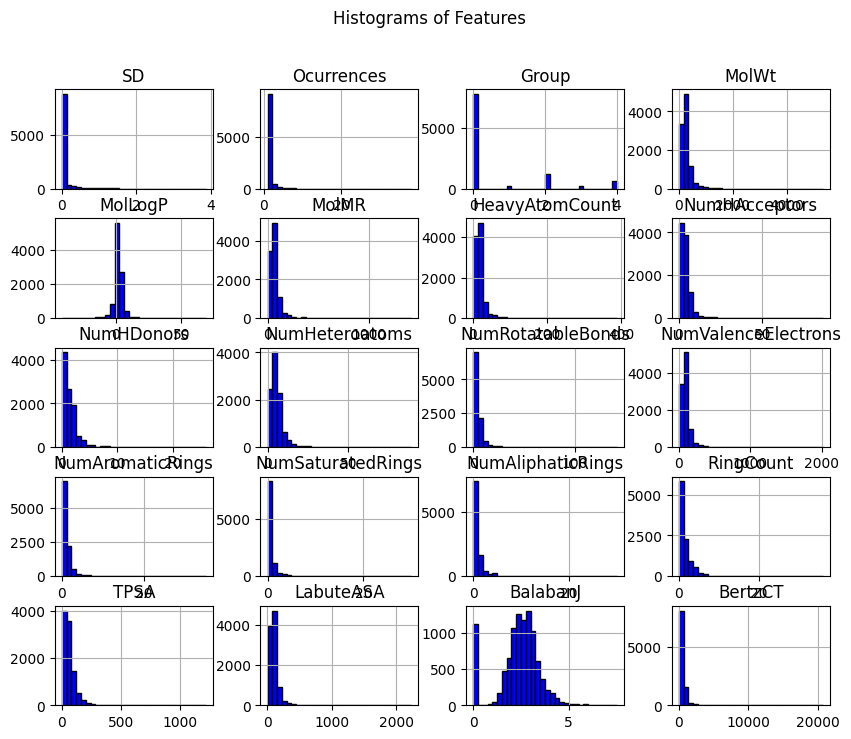

In [ ]:
x.hist(figsize=(10, 8), bins=30, color='blue', edgecolor='black')
# `data.hist()` : A built-in Pandas method that can simultaneously plot histograms for all numeric columns in a DataFrame.
plt.suptitle("Histograms of Features")
plt.show()

## Check and understand each feature.
Try to understand the meaning of each feature and confirm its data type. Different types of features (e.g., numerical, categorical) may require different handling methods.

In [ ]:
x.info()  # Check the data types, missing values, and other basic information.
x.describe()  # Check the statistical information of numerical features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SD                   9982 non-null   float64
 1   Ocurrences           9982 non-null   int64  
 2   Group                9982 non-null   int64  
 3   MolWt                9982 non-null   float64
 4   MolLogP              9982 non-null   float64
 5   MolMR                9982 non-null   float64
 6   HeavyAtomCount       9982 non-null   float64
 7   NumHAcceptors        9982 non-null   float64
 8   NumHDonors           9982 non-null   float64
 9   NumHeteroatoms       9982 non-null   float64
 10  NumRotatableBonds    9982 non-null   float64
 11  NumValenceElectrons  9982 non-null   float64
 12  NumAromaticRings     9982 non-null   float64
 13  NumSaturatedRings    9982 non-null   float64
 14  NumAliphaticRings    9982 non-null   float64
 15  RingCount            9982 non-null   f

,SD,Ocurrences,Group,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
count,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000
mean,0.067449,1.378081,0.570226,266.665946,1.979167,66.794594,17.374674,3.486776,1.108595,5.196955,4.073031,94.243438,1.068323,0.292627,0.447606,1.515929,62.458601,108.912586,2.392199,467.336782
std,0.234702,1.023476,1.164734,184.179024,3.517738,46.523021,12.241536,3.498203,1.488973,4.736275,5.646925,64.748563,1.309427,0.879599,1.054667,1.644334,63.348307,76.462726,1.091123,546.631696
min,0.000000,1.000000,0.000000,9.012000,-40.873200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.504228,-0.000004,0.000000
25%,0.000000,1.000000,0.000000,162.276000,0.619750,40.602475,11.000000,2.000000,0.000000,3.000000,1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,26.300000,66.623721,2.004357,163.243343
50%,0.000000,1.000000,0.000000,228.682000,1.949220,58.633400,15.000000,3.000000,1.000000,4.000000,3.000000,82.000000,1.000000,0.000000,0.000000,1.000000,50.720000,93.299873,2.539539,351.640433
75%,0.000000,1.000000,0.000000,320.436000,3.419030,81.938000,21.000000,4.000000,2.000000,6.000000,5.000000,112.000000,2.000000,0.000000,1.000000,2.000000,80.390000,129.118374,3.032456,606.562848
max,3.870145,38.000000,4.000000,5299.456000,68.541140,1419.351700,388.000000,86.000000,26.000000,89.000000,141.000000,2012.000000,35.000000,30.000000,30.000000,36.000000,1214.340000,2230.685124,7.517310,20720.267708


## Missing values:

In [ ]:
x.fillna(x.mean(), inplace=True)  # Fill with the mean value.
# Delete rows containing missing values.
x.dropna(inplace=True)
len(x)

9982

In [ ]:
len(y)

9982

## Normalize numerical features：

If the data follows a normal distribution or is close to a normal distribution: Z-Score normalization is applied, which adjusts the mean of each feature to 0 and the standard deviation to 1.

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x) # Normalize all numerical features.

print("The first 5 rows of the normalized data:\n", x_scaled[:5])

The first 5 rows of the normalized data:
 [[-0.28739417 -0.3694269  -0.48960115  0.68330451  0.56258654  0.76634302
   0.45955079 -0.99678336 -0.74457428 -0.67502726  2.28931958  0.7376064
  -0.81591169 -0.33269878 -0.42442588 -0.92195666 -0.98600473  0.64881939
  -2.19252929 -0.47010139]
 [-0.28739417 -0.3694269  -0.48960115 -0.52931016  0.12120124 -0.32014559
  -0.3573811  -0.71090801 -0.07293679 -0.67502726 -0.7213192  -0.49800416
   0.71155089 -0.33269878  0.52378789  0.90258168 -0.52661664 -0.44113929
   0.17487188  0.08030026]
 [-0.28739417 -0.3694269  -0.48960115 -0.68467766  0.04927642 -0.64390906
  -0.68415386 -0.71090801 -0.74457428 -0.67502726 -0.5442228  -0.74512627
  -0.0521804  -0.33269878 -0.42442588 -0.31377722 -0.71652863 -0.66246644
   0.56603488 -0.48421813]
 [-0.28739417 -0.3694269  -0.48960115  2.65819945  1.74465537  2.87863326
   2.91034647  0.71846873  0.5987007   0.38070759  1.04964478  2.6219125
   3.76647606 -0.33269878 -0.42442588  2.72712003  0.91974545  2.

## Feature selection or dimensionality reduction：

In [ ]:
# Calculate the correlation
correlation_matrix = x.corr()

# Get feature pairs with correlation greater than 0.9
high_correlation = correlation_matrix[correlation_matrix > 0.9]
print(high_correlation)

                      SD  Ocurrences  Group     MolWt  MolLogP     MolMR  \
SD                   1.0         NaN    NaN       NaN      NaN       NaN   
Ocurrences           NaN         1.0    NaN       NaN      NaN       NaN   
Group                NaN         NaN    1.0       NaN      NaN       NaN   
MolWt                NaN         NaN    NaN  1.000000      NaN  0.918897   
MolLogP              NaN         NaN    NaN       NaN      1.0       NaN   
MolMR                NaN         NaN    NaN  0.918897      NaN  1.000000   
HeavyAtomCount       NaN         NaN    NaN  0.950358      NaN  0.974646   
NumHAcceptors        NaN         NaN    NaN       NaN      NaN       NaN   
NumHDonors           NaN         NaN    NaN       NaN      NaN       NaN   
NumHeteroatoms       NaN         NaN    NaN       NaN      NaN       NaN   
NumRotatableBonds    NaN         NaN    NaN       NaN      NaN       NaN   
NumValenceElectrons  NaN         NaN    NaN  0.945888      NaN  0.973741   
NumAromaticR

## Dimensionality reduction using Principal Component Analysis (PCA)：

If the data has very high dimensionality (many features), Principal Component Analysis (PCA) can be used for dimensionality reduction. PCA selects the most important features based on the variance, with features having low variance typically being discarded.

In [ ]:
# Perform dimensionality reduction using PCA.
from sklearn.decomposition import PCA
pca = PCA(n_components=5)  # Reduce the data to 5 principal components.
x_reduced = pca.fit_transform(x)
print(x_reduced)

[[-1.97436781e+02  2.17295117e+02 -7.53848978e+01  7.61305916e+00
   4.84271544e+00]
 [ 2.93871449e+00 -1.20619205e+02 -2.05745594e+01 -3.19320365e+00
   6.97743984e-02]
 [-3.01108082e+02 -5.36709786e+01 -1.70223429e+01 -7.52547883e+00
   2.83093522e+00]
 ...
 [-2.49371893e+02 -5.35421595e+01 -1.96841993e+01  4.60637317e+00
   1.16710235e+00]
 [ 5.20413539e+02  5.79967688e+01 -4.74233746e+01  2.29609240e+01
  -8.28670322e-01]
 [ 4.34800917e+02 -9.72951276e+01 -1.67912100e+01  2.90015738e+00
  -3.56499553e+00]]


# Data set classification:

In [ ]:
seed = 42 # Set a random seed to ensure that all subsequent calculations are reproducible.

In [ ]:
# randomly select 20% of compounds as test set
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.20, random_state=seed)

# Hyperparameter tuning:

Grid Search: Suitable for fine-tuning within a small range, but computationally expensive.

Random Search: Suitable for tuning over a large range, faster, but may not be as precise.

Bayesian Optimization: More intelligent, suitable for efficient optimization.

✅ Important hyperparameters of SVR:

## Perform hyperparameter optimization using a grid search dictionary：

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Set the hyperparameter search space
param_grid = {
    'max_depth': [3, 5, 10, None],  # Maximum depth of the tree.
    'min_samples_split': [2, 5, 10],  # Minimum samples per internal node.
    'min_samples_leaf': [1, 2, 5]  # Minimum samples per leaf node.
}

# Create the model.
dt = DecisionTreeRegressor()

# Grid search + 5-fold cross-validation.
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_tr, y_tr)

# Output the best parameters.
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}


# Train the model：

Linear Regression: Suitable for linear relationships and simple data, fast in computation, but sensitive to outliers.

Decision Tree Regression: Suitable for non-linear relationships, can handle complex data structures, has good interpretability, but prone to overfitting.

SVR (Support Vector Regression): Suitable for high-dimensional and complex non-linear regression problems, robust to outliers, but computationally expensive and requires parameter tuning.


## Creating decision tree regression models using best hyperparameters：

In [ ]:
# Create the model using the best hyperparameters
best_model = DecisionTreeRegressor(
    max_depth=10,
    min_samples_leaf=5,
    min_samples_split=5)
# Train the model
best_model.fit(x_tr, y_tr)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=5)

## Make predictions using the trained model：

In [ ]:
# predict
y_pred = best_model.predict(x_ts)
print("Prediction results:", y_pred)

Prediction results: [-3.79526509 -3.11422    -3.17111136 ... -3.59829957  0.49138508
 -2.03611923]


### Evaluate the model's performance：

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error
mse = mean_squared_error(y_ts, y_pred)
print("the mean squared error (MSE):", mse)

# Calculate the coefficient of determination (R²)
r2 = r2_score(y_ts, y_pred)
print("the coefficient of determination (R²):", r2)

the mean squared error (MSE): 1.643806757956144
the coefficient of determination (R²): 0.6969743330692016


Dimensionality reduction (x):
- Mean Squared Error (MSE): 2.208438915097816
- Coefficient of Determination (R²): 0.5928878672116404

Without dimensionality reduction (x):
- Mean Squared Error (MSE): 1.637225536827746
- Coefficient of Determination (R²): 0.6981875407117664

✅The smaller the MSE and the closer R² is to 1, the better the model's performance.

## View feature importance:

In [ ]:
imf = best_model.feature_importances_
print(imf)
# Get feature names
feature_names = best_model.feature_names_in_

# Sort feature importance (from largest to smallest)
indices = np.argsort(imf)[::-1]

# Print feature rankings
print("Feature ranking:")

# Print the top 10 features and their importance values
for i in range(min(10, len(imf))):  # Prevent the number of features from being less than 10
    print(f"{i + 1}. {feature_names[indices[i]]} (Importance: {imf[indices[i]]:.6f})")

[4.76219148e-03 8.69579625e-04 1.89215189e-03 4.57618975e-02
 7.64973058e-01 2.11240192e-02 8.14294591e-03 4.19689085e-03
 2.32882218e-03 1.25246016e-02 1.02077610e-02 3.31621999e-03
 1.57307000e-03 7.62065215e-04 1.73746076e-03 1.68455260e-03
 1.76351016e-02 7.21170458e-03 2.72378399e-02 6.20580660e-02]
Feature ranking:
1. MolLogP (Importance: 0.764973)
2. BertzCT (Importance: 0.062058)
3. MolWt (Importance: 0.045762)
4. BalabanJ (Importance: 0.027238)
5. MolMR (Importance: 0.021124)
6. TPSA (Importance: 0.017635)
7. NumHeteroatoms (Importance: 0.012525)
8. NumRotatableBonds (Importance: 0.010208)
9. HeavyAtomCount (Importance: 0.008143)
10. LabuteASA (Importance: 0.007212)


# Save the model：

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, "best_decision_tree_model.pkl")

# Load the model
loaded_model = joblib.load("best_decision_tree_model.pkl")

## Support Vector Regression (SVR):


In [ ]:
from sklearn.svm import SVR
x_train = np.array(x_tr)  # feature
y_train = np.array(y_tr)  # Target value.

# Create an SVR (Support Vector Regression) model
model = SVR(C=1.0, epsilon=0.1, kernel='rbf')

# Train the model
model.fit(x_train, y_train)

SVR()

##Make predictions using the trained model:

In [ ]:

x_test = np.array([x_ts])
y_pred = model.predict(x_ts)

print(f"Predicted values: {y_pred}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


Predicted values: [-4.56771951 -3.58916373 -3.03590551 ... -3.0322275  -1.60765545
 -1.89535168]


## Evaluate the model's performance:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error(MSE)
mse = mean_squared_error(y_ts, y_pred)
print("the mean squared error (MSE):", mse)

# Calculate the coefficient of determination(R²)
r2 = r2_score(y_ts, y_pred)
print("the coefficient of determination (R²):", r2)

the mean squared error (MSE): 2.450819514597282
the coefficient of determination (R²): 0.5482064942589372


the mean squared error (MSE): 2.450819514597282

the coefficient of determination (R²): 0.5482064942589372